# MNIST Digits classification with Neural Networks

## 1. Installations and importations

In [6]:
%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     ------ ------------------------------ 30.7/165.5 kB 660.6 kB/s eta 0:00:01
     ---------------- -------------------- 71.7/165.5 kB 787.7 kB/s eta 0:00:01
     ---------------------- ------------- 102.4/165.5 kB 737.3 kB/s eta 0:00:01
     -------------------------- --------- 122.9/165.5 kB 654.9 kB/s eta 0:00:01
     ------------------------------------ 165.5/165.5 kB 764.8 kB/s eta 0:00:00
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB 1.3 MB/s eta 0:00:07
   ---------------------------------------- 0.1/8.0 MB 991.0 kB/s eta 0:00:08
   ---------------------------------------- 0.1/8.0 MB 871.5 kB/s eta 0:00:10
   ---------------------------------------- 0.1/8.0 MB 871.5 kB/s eta 0:00:10
   - -------------

In [3]:
import numpy as np
import tensorflow as tf
import keras
print("Using tensorflow version " + str(tf.__version__))
print("Using keras version " + str(keras.__version__))

Using tensorflow version 2.10.0
Using keras version 2.10.0


## 2. MNIST Dataset import and preparation
Load the MNIST dataset made available by keras.datasets. Check the size of the training and testing sets. 


In [4]:
# The MNSIT dataset is ready to be imported from Keras into RAM
# Warning: you cannot do that for larger databases (e.g., ImageNet)
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
print("Size of train_images : ",train_images.shape)
print("Size of train_labels : ",train_labels.shape)
print("Size of test_images : ",test_images.shape)
print("Size of test_labels : ",test_labels.shape)


11490434/11490434 [==============================] - 13s 1us/step
Size of train_images :  (60000, 28, 28)
Size of train_labels :  (60000,)
Size of test_images :  (10000, 28, 28)
Size of test_labels :  (10000,)


The MNIST database contains 60,000 training images and 10,000 testing images.
Using the pyplot package, visualize the first sample of the training set:


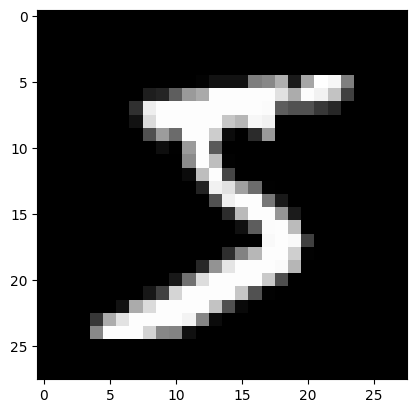

In [7]:
# Let us visualize the first training sample using the Matplotlib library with the imshow function
from matplotlib import pyplot as plt

plt.imshow(train_images[0],cmap='gray')


The database contains images of handwritten digits. Hence, they belong to one of 10 categories, depending on the digit they represent. 
Reminder: in order to do multi-class classification, we use the **softmax function**, which outputs a multinomial probability distribution. That means that the output to our model will be a vector of size $10$, containing probabilities (meaning that the elements of the vector will be positive sum to $1$).
For easy computation, we want to true labels to be represented with the same format: that is what we call **one-hot encoding**. For example, if an image $\mathbf{x}$ represents the digit $5$, we have the corresponding one_hot label (careful, $0$ will be the first digit): 
$$ \mathbf{y} = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] $$
Here, you need to turn train and test labels to one-hot encoding using the following function: 

In [8]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels,num_classes=10)
test_labels = to_categorical(test_labels,num_classes=10)

Images are black and white, with size $28 \times 28$. We will work with them using a simple linear classification model, meaning that we will have them as vectors of size $(784)$.
You should then transform the images to the size $(784)$ using the numpy function ```reshape```.

Then, after casting the pixels to floats, normalize the images so that they have zero-mean and unitary deviation. Be careful to your methodology: while you have access to training data, you may not have access to testing data, and must avoid using any statistic on the testing dataset.

In [9]:
# Reshape images to vectors of pixels
img_rows, img_cols = train_images.shape[1], train_images.shape[2]
train_images = train_images.reshape(train_images.shape[0],784)
test_images = test_images.reshape(test_images.shape[0],784)


# Cast pixels from uint8 to float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Now let us normalize the images so that they have zero mean and standard deviation
train_mean = np.mean(train_images)
train_std = np.std(train_images)
train_images = (train_images - train_mean)/train_std
test_images = (test_images - train_mean)/train_std